In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()   # for plot styling
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
df = pd.read_csv("driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop("id", axis=1)

In [7]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [8]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [9]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[1 1 1 ... 0 0 0]
4000


In [10]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print (dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


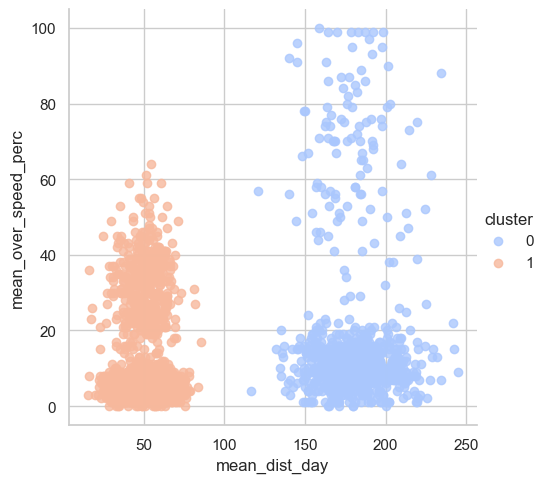

In [11]:
df_analyze["cluster"] = kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x="mean_dist_day", y="mean_over_speed_perc", data = df_analyze, hue = "cluster", palette = "coolwarm", aspect = 1, fit_reg = False)

In [12]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(df.drop("id", axis = 1))
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_, return_counts = True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 50.46127059  32.42823529]
 [180.34311782  10.52011494]
 [ 49.98428468   5.21441441]
 [177.83509615  70.28846154]]
{0: 425, 1: 696, 2: 2775, 3: 104}


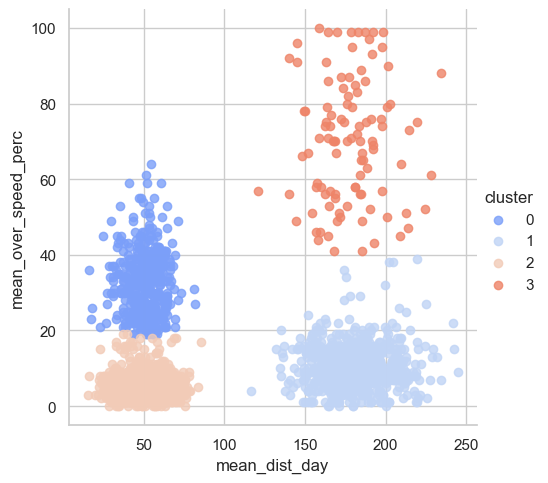

In [13]:
df_analyze["cluster"] = kmeans_4.labels_
sns.set_style("whitegrid")
sns.lmplot(x="mean_dist_day", y="mean_over_speed_perc", data = df_analyze, hue = "cluster", palette = "coolwarm", aspect = 1, fit_reg = False)